[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Figures 5.16 and 5.19

Analysis of anthropometric data from the US army (height, weight and foot size)\
Topics: Joint probability density function, kernel density estimation, Gaussian random vectors, maximum likelihood estimation, parametric and nonparametric models

Author: Carlos Fernandez-Granda\
Data source: http://mreed.umtri.umich.edu/mreed/downloads.html

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
from scipy import stats

data = pd.read_csv ("../data/ANSUR II MALE Public.csv", encoding='latin-1')

font_size = 15
font_size_legend = 15
font_size_ticks = 15

Text(0, 0.5, 'Foot length (cms)')

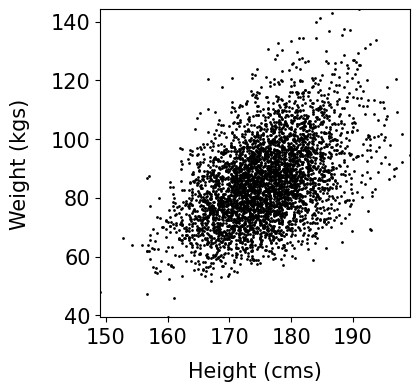

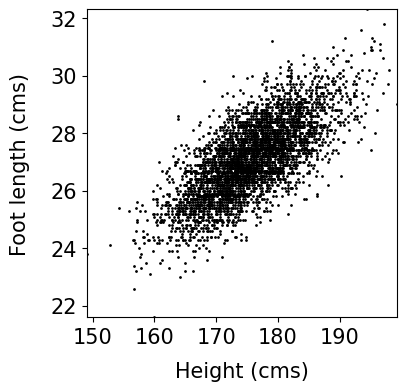

In [16]:
stature = data['stature'] / 10.
head = data['headcircumference'] / 10
reported_height = data['Heightin'] * 2.54
weight = data['weightkg']/10
reported_weight = data['Weightlbs'] * 0.453592
foot = data['footlength']/10.

stature_min = stature.min()
stature_max = stature.max()
weight_min = weight.min()
weight_max = weight.max()
foot_min = foot.min()
foot_max = foot.max()

markersize = 1
plt.figure(figsize=(4,4))
plt.scatter(stature,weight,s=markersize,color="black",rasterized=True)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([weight_min,weight_max])
plt.xlim([stature_min,stature_max])
plt.xlabel('Height (cms)',fontsize=font_size,labelpad = 10)
plt.ylabel('Weight (kgs)',fontsize=font_size,labelpad = 15)

plt.figure(figsize=(4,4))
plt.scatter(stature,foot,s=markersize,color="black",rasterized=True)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([foot_min,foot_max])
plt.xlim([stature_min,stature_max])
plt.xlabel('Height (cms)',fontsize=font_size,labelpad = 10)
plt.ylabel('Foot length (cms)',fontsize=font_size,labelpad = 15)

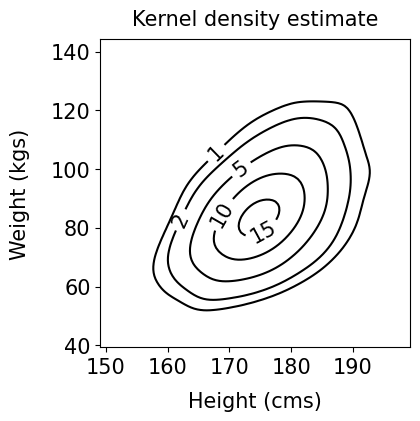

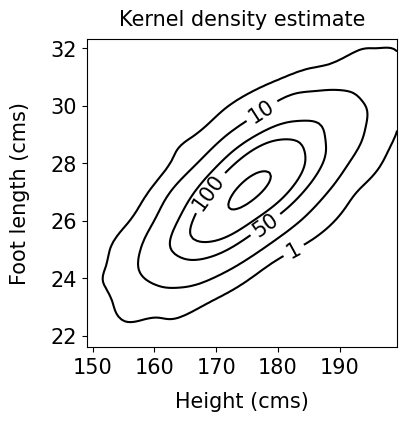

In [17]:
def KDE_2D(data_1,data_2,x,y,bw=None):
    grid = np.vstack([x.ravel(), y.ravel()])
    values = np.vstack([data_1, data_2])
    kernel = stats.gaussian_kde(values,bw_method=bw)
    kde = np.reshape(kernel(grid).T, x.shape)
    return kde

def fmt(x):
    s = f"{x:.4f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"

stature_weight_x,stature_weight_y = np.mgrid[stature_min:stature_max:100j, weight_min:weight_max:100j]
stature_foot_x,stature_foot_y = np.mgrid[stature_min:stature_max:100j, foot_min:foot_max:100j]

bw_vals = [0.4]
levels_weight = [1,2,5,10,15,20,25,30]
levels_foot = [1,10,50,100,200]
alpha = 0.5

for ind,bw in enumerate(bw_vals):
    kde = KDE_2D(stature,weight,stature_weight_x,stature_weight_y,bw=bw)
    plt.figure(figsize=(4,4))
    # plt.scatter(stature,weight,s=markersize,color="gray",alpha=alpha,rasterized=True)
    CS = plt.contour(stature_weight_x,stature_weight_y, 1e4*kde, levels=levels_weight,colors='black')
    plt.clabel(CS, CS.levels, inline=True, fmt=fmt,fontsize=font_size_ticks)
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.ylim([weight_min,weight_max])
    plt.xlim([stature_min,stature_max])
    plt.xlabel('Height (cms)',fontsize=font_size,labelpad = 10)
    plt.ylabel('Weight (kgs)',fontsize=font_size,labelpad = 15)
    plt.title("Kernel density estimate",fontsize=font_size,pad=10)
    
    kde = KDE_2D(stature,foot,stature_foot_x,stature_foot_y,bw=bw)
    plt.figure(figsize=(4,4))
    # plt.scatter(stature,foot,s=markersize,color="gray",alpha=alpha,rasterized=True)
    CS = plt.contour(stature_foot_x,stature_foot_y, 1e4*kde, levels=levels_foot,colors='black')
    plt.clabel(CS, CS.levels, inline=True, fmt=fmt,fontsize=font_size_ticks)
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.ylim([foot_min,foot_max])
    plt.xlim([stature_min,stature_max])
    plt.xlabel('Height (cms)',fontsize=font_size,labelpad = 10)
    plt.ylabel('Foot length (cms)',fontsize=font_size,labelpad = 15)
    plt.title("Kernel density estimate",fontsize=font_size,pad=10)

Text(0.5, 1.0, 'Gaussian model\n (assuming independence)')

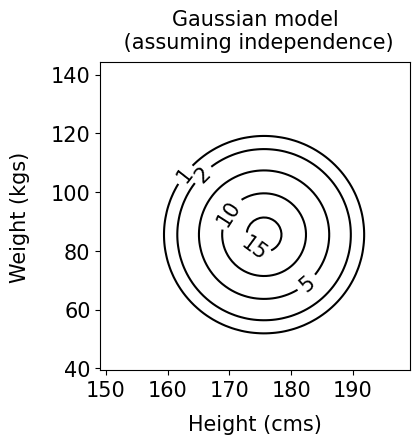

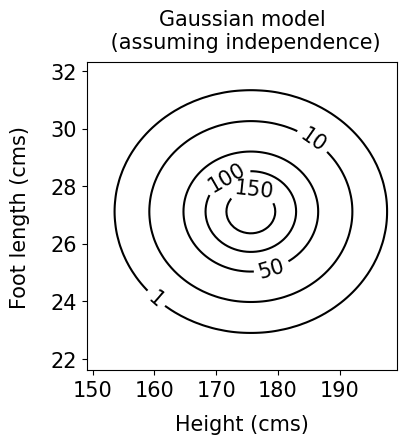

In [18]:
# Maximum likelihood estimation assuming a Gaussian parametric distribution and independence between the features
mu_stature = np.mean(stature)
sigma_stature = np.std(stature)
mu_weight = np.mean(weight)
sigma_weight = np.std(weight)
mu_foot = np.mean(foot)
sigma_foot = np.std(foot)

def gaussian_indep(x,y,mu_1,mu_2,sigma_1,sigma_2):
    return (np.exp(- (x-mu_1)**2/sigma_1**2/2 - (y-mu_2)**2/sigma_2**2/2)
                  /(2 * np.pi * sigma_1 * sigma_2 ))

z_gaussian_stature_weight_indep = gaussian_indep(stature_weight_x,stature_weight_y,mu_stature,mu_weight,sigma_stature,sigma_weight)
levels_weight_gaussian = [10,50,100,200,300]

plt.figure(figsize=(4,4))
CS = plt.contour(stature_weight_x,stature_weight_y, 1e4*z_gaussian_stature_weight_indep, levels=levels_weight,colors='black')
plt.clabel(CS, CS.levels, inline=True, fmt=fmt,fontsize=font_size_ticks)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([weight_min,weight_max])
plt.xlim([stature_min,stature_max])
plt.xlabel('Height (cms)',fontsize=font_size,labelpad = 10)
plt.ylabel('Weight (kgs)',fontsize=font_size,labelpad = 15)
plt.title("Gaussian model\n (assuming independence)",fontsize=font_size,pad=10)
    
z_gaussian_stature_foot_indep = gaussian_indep(stature_foot_x,stature_foot_y,mu_stature,mu_foot,sigma_stature,sigma_foot)

levels_foot_gaussian = [1,10,50,100,150,200,300]

plt.figure(figsize=(4,4))
# plt.scatter(stature,foot,s=markersize,color="gray",alpha=alpha,rasterized=True)
CS = plt.contour(stature_foot_x,stature_foot_y, 1e4*z_gaussian_stature_foot_indep, levels=levels_foot_gaussian,colors='black')
plt.clabel(CS, CS.levels, inline=True, fmt=fmt,fontsize=font_size_ticks)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([foot_min,foot_max])
plt.xlim([stature_min,stature_max])
plt.xlabel('Height (cms)',fontsize=font_size,labelpad = 10)
plt.ylabel('Foot length (cms)',fontsize=font_size,labelpad = 15)
plt.title("Gaussian model\n (assuming independence)",fontsize=font_size,pad=10)

In [19]:
# Maximum likelihood estimation assuming a Gaussian parametric distribution
stature_weight = np.vstack((stature,weight))
mu_stature_weight = np.mean(stature_weight,axis=1)
Sigma_stature_weight = np.cov(stature_weight)
print(mu_stature_weight)
print(Sigma_stature_weight)

stature_foot = np.vstack((stature,foot))
mu_stature_foot = np.mean(stature_foot,axis=1)
Sigma_stature_foot = np.cov(stature_foot)

[175.62146007  85.52395884]
[[ 46.9921049   45.71080892]
 [ 45.71080892 202.22828641]]


Text(0.5, 1.0, 'Gaussian model')

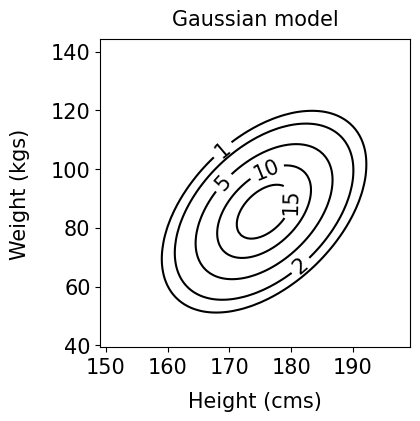

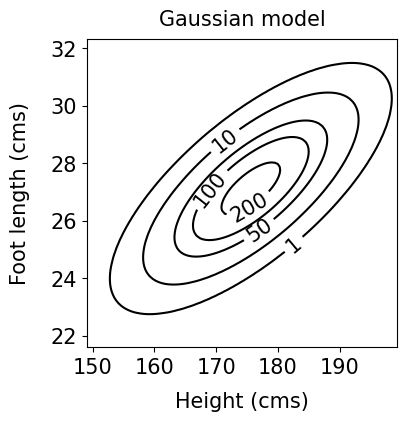

In [20]:
invSigma_stature_weight = np.linalg.inv(Sigma_stature_weight)
invSigma_stature_foot = np.linalg.inv(Sigma_stature_foot)

def gaussian(x,y,mu,invSigma,Sigma):
    return (np.exp(-(invSigma[0,0] * (x-mu[0])**2 + 2*invSigma[0,1]*(x-mu[0])*(y-mu[1]) + invSigma[1,1] * (y-mu[1])**2)/2)
                  /(2 * np.pi * np.sqrt(np.linalg.det(Sigma))))

z_gaussian_stature_weight = gaussian(stature_weight_x,stature_weight_y,mu_stature_weight,invSigma_stature_weight,Sigma_stature_weight)
levels_weight_gaussian = [10,50,100,200,300]

plt.figure(figsize=(4,4))
CS = plt.contour(stature_weight_x,stature_weight_y, 1e4*z_gaussian_stature_weight, levels=levels_weight,colors='black')
plt.clabel(CS, CS.levels, inline=True, fmt=fmt,fontsize=font_size_ticks)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([weight_min,weight_max])
plt.xlim([stature_min,stature_max])
plt.xlabel('Height (cms)',fontsize=font_size,labelpad = 10)
plt.ylabel('Weight (kgs)',fontsize=font_size,labelpad = 15)
plt.title("Gaussian model",fontsize=font_size,pad=10)

z_gaussian_stature_foot = gaussian(stature_foot_x,stature_foot_y,mu_stature_foot,invSigma_stature_foot,Sigma_stature_foot)
levels_foot_gaussian = [1,10,50,100,200,300]

plt.figure(figsize=(4,4))
# plt.scatter(stature,foot,s=markersize,color="gray",alpha=alpha,rasterized=True)
CS = plt.contour(stature_foot_x,stature_foot_y, 1e4*z_gaussian_stature_foot, levels=levels_foot_gaussian,colors='black')
plt.clabel(CS, CS.levels, inline=True, fmt=fmt,fontsize=font_size_ticks)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([foot_min,foot_max])
plt.xlim([stature_min,stature_max])
plt.xlabel('Height (cms)',fontsize=font_size,labelpad = 10)
plt.ylabel('Foot length (cms)',fontsize=font_size,labelpad = 15)
plt.title("Gaussian model",fontsize=font_size,pad=10)